In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import zipfile

**Task1**

In [4]:
with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('data')
df = pd.read_csv('/content/data/data/iris.csv')

print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [5]:
from sklearn.preprocessing import StandardScaler

# Step 1: Separate the class variable into y
y = df['species']

# Step 2: Remove the 'species' column from df
df = df.drop('species', axis=1)

# Step 3: Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Step 4: Convert the result back to a DataFrame with original column names
df = pd.DataFrame(df_scaled, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# Step 5: Display the first 5 rows
print(df.head())


   sepal_length  sepal_width  petal_length  petal_width
0     -0.900681     1.032057     -1.341272    -1.312977
1     -1.143017    -0.124958     -1.341272    -1.312977
2     -1.385353     0.337848     -1.398138    -1.312977
3     -1.506521     0.106445     -1.284407    -1.312977
4     -1.021849     1.263460     -1.341272    -1.312977


**TASK 2**

In [10]:
from sklearn.cluster import KMeans

# Create KMeans object with required parameters
kmeans = KMeans(
    n_clusters=3,
    random_state=1,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    verbose=0
)


kmeans.fit(df)

print(kmeans.get_params())



{'algorithm': 'lloyd', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 3, 'n_init': 10, 'random_state': 1, 'tol': 0.0001, 'verbose': 0}


TASK 3

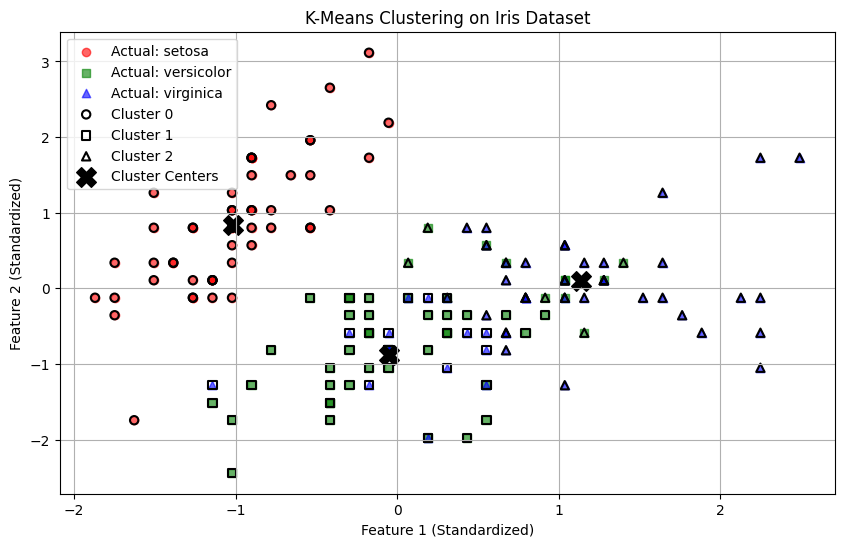

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Assign cluster labels and actual labels
cluster_labels = kmeans.labels_

# Get unique class labels and numeric codes
actual_labels, label_names = pd.factorize(y)  # actual_labels are numeric, label_names are strings

# Marker and color map
markers = ['o', 's', '^']  # For actual classes
colors = ['red', 'green', 'blue']

plt.figure(figsize=(10, 6))

# Plot actual classes with real species names
for i in range(3):
    plt.scatter(
        df.iloc[actual_labels == i, 0],
        df.iloc[actual_labels == i, 1],
        c=colors[i],
        marker=markers[i],
        label=f'Actual: {label_names[i]}',
        alpha=0.6
    )

# Overlay predicted clusters
for i in range(3):
    plt.scatter(
        df.iloc[cluster_labels == i, 0],
        df.iloc[cluster_labels == i, 1],
        facecolors='none',
        edgecolors='black',
        marker=markers[i],
        linewidths=1.5,
        label=f'Cluster {i}'
    )

# Plot cluster centers as "X"
centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0], centers[:, 1],
    c='black',
    marker='X',
    s=200,
    label='Cluster Centers'
)

plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()
plt.grid(True)
plt.show()
